## Example 2.1 in the book: 'Surface water-quality modeling' by Steven C. Chapra

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
t = np.array([0.0, 1.0, 3.0, 5.0, 10.0, 15.0, 20.0])
c = np.array([12.0, 10.7, 9.0, 7.1, 4.6, 2.5, 1.8])

Text(0, 0.5, 'c (mg/L)')

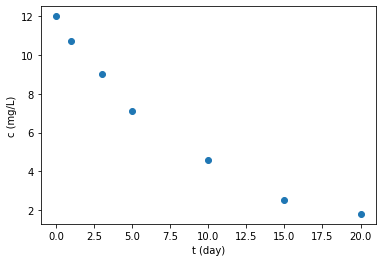

In [4]:
plt.plot(t,c,'o')
plt.xlabel('t (day)')
plt.ylabel('c (mg/L)')

## Zero-order

Fit zero-order solution to the data:

$c = c_0 - kt$

If we fit a linear equation to the data of $c$ vs. $t$, the slope is $-k$.

In [20]:
f0 = np.polyfit(t,c,1)

zero-order reaction rate k =  0.5103577371048252 mg/(L day)
c_0 =  10.751331114808652 mg/L


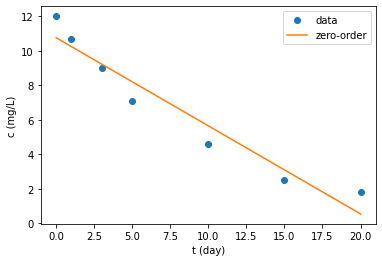

In [30]:
# The slope is -k
k0 = -f0[0]

# y-intercept is c_0 
c0_0 = f0[1]

# Plot the result
plt.plot(t,c,'o',label = 'data')
plt.xlabel('t (day)')
plt.ylabel('c (mg/L)')
plt.plot(t,f0[0]*t + f0[1],label = 'zero-order')
plt.legend()
print('zero-order reaction rate k = ', k0, 'mg/(L day)')
print('c_0 = ', c0_0, 'mg/L')

## First-order

First-order solution:

$c/c_0 = \exp{-kt}$

Take log on both sides of equation, we obtain:

$\ln{c} - \ln{c_0}  = - kt$

$\ln{c} = -kt + \ln{c_0}$

We can fit a linear equation to the data of $\ln{c}$ vs. $t$ so that the slope if $-k$ and the intercept is $\ln{c_0}$.

First-order reaction rate k =  0.0971877061245633 /day
c_0 =  11.823696015955575 mg/L


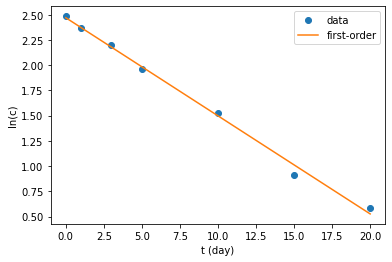

In [29]:
f1 = np.polyfit(t,np.log(c),1)

plt.plot(t,np.log(c),'o',label = 'data')
plt.xlabel('t (day)')
plt.ylabel('ln(c)')
plt.plot(t,f1[0]*t + f1[1],label = 'first-order')
plt.legend()

k1 = -f1[0]
c0_1 = np.exp(f1[1])

print('First-order reaction rate k = ', k1, '/day')
print('c_0 = ', c0_1, 'mg/L')

## Second-order

Second-order solution is:

$1/c = 1/c_0 + kt$

or $c = c_0 \frac{1}{1+kc_0t}$

If we fit a linear equation to the data of $1/c$ vs $t$, the slope is $k$, and the intercept is $1/c_0$.

Second-order reaction rate k =  0.023469547536673123 L/(mg day)
c_0 =  20.9368491211029 mg/L


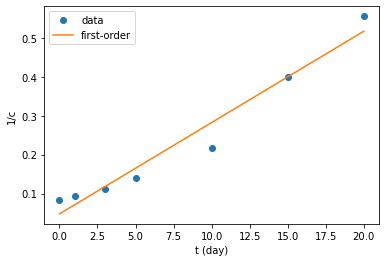

In [28]:
f2 = np.polyfit(t,1/c,1)

plt.plot(t,1/c,'o',label = 'data')
plt.xlabel('t (day)')
plt.ylabel('1/c')
plt.plot(t,f2[0]*t + f2[1],label = 'first-order')
plt.legend()

k2 = f2[0]
c0_2 = 1/f2[1]
print('Second-order reaction rate k = ', k2, 'L/(mg day)')
print('c_0 = ', c0_2, 'mg/L')

## Differential method to estimate the reaction order 

nth-order:

$\frac{dc}{dt} = -k c^n$.

Applying logarithmic transfrom, we obtain:

$\log \left( -\frac{dc}{dt} \right) = \log k + n \log c$

Therefore, $\log(-dc/dt)$ vs. $\log c$ has a linear relation. If we fit the above equation to the data, the slope is an estimate of the reaction order. The intercept is $\log k$. 

The estimate of reaction order is  1.10326321104748
The reaction rate k =  0.08565843204462398 /day


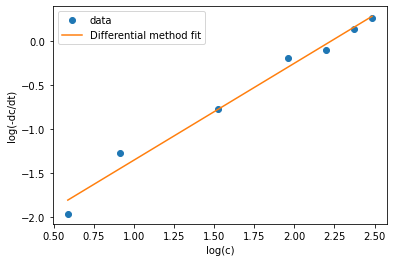

In [43]:
dcdt = np.gradient(c,t)

f = np.polyfit(np.log(c), np.log(-dcdt),1)

n = f[0]
k = np.exp(f[1])

plt.plot(np.log(c),np.log(-dcdt),'o',label = 'data')
plt.plot(np.log(c), f[0]*np.log(c)+f[1],label = 'Differential method fit')
plt.xlabel('log(c)')
plt.ylabel('log(-dc/dt)')
plt.legend()
print('The estimate of reaction order is ', n)
print('The reaction rate k = ', k, '/day')